# Predicci√≥n de variable continua

**Autor:** Jazna Meza Hidalgo

**Correo Electr√≥nico:** ja.meza@profesor.duoc.cl

**Fecha de Creaci√≥n:** Diciembre de 2024  
**Versi√≥n:** 1.0  

---

## Descripci√≥n

Este notebook ofrece un ejemplo de predicci√≥n de una variable continua. Incluyendo, adem√°s, el an√°lisis exploratorio de datos.

Se utilizan 2 algoritmos:

+ LinearRegression
+ DecisionTreeRegressor

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuaci√≥n se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.6.0)

Para verificar la versi√≥n instalada ejecutar usando el siguiente comando, usando la librer√≠a de la cual quieres saber la versi√≥n:

```bash
import pandas as pd
print(pd.__version__)
````

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree

In [2]:
!wget https://www.dropbox.com/s/6xn8hxmo16f25qc/insurance.csv

--2025-04-12 20:42:05--  https://www.dropbox.com/s/6xn8hxmo16f25qc/insurance.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/unto7vjrswe6u4w1nukvx/insurance.csv?rlkey=yr81nii85hmym91r9qdpzh76l [following]
--2025-04-12 20:42:06--  https://www.dropbox.com/scl/fi/unto7vjrswe6u4w1nukvx/insurance.csv?rlkey=yr81nii85hmym91r9qdpzh76l
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0cb32b09cc4149c0e5aeb9443.dl.dropboxusercontent.com/cd/0/inline/Cns_MjUgQ3Y96z5Rq-ThkYskzqqqzXzahMzdvbC6LIjKSFkqKnTqXVrjT1lV5A3N-oo2o21Ym42HMdBturicnkrOAc_P9SNC_tcJZhPHQfg8s4gPknnq-ZYD5nE-EbobnMiiepmY1nWMYxemGICOU8dZ/file# [following]
--2025-04-12 20:42:06--  https://ucb0cb32b09cc4149c0e5aeb9443.dl.dropboxusercontent.com/cd/0/inlin

In [3]:
data_frame = pd.read_csv("insurance.csv")
data_frame

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

# Objetivo

El conjunto de datos que vamos a utilizar aqu√≠ tiene datos relacionados con algunos clientes que han optado por un seguro, necesitamos predecir el monto de los costos del seguro m√©dico (charges) en funci√≥n de las caracter√≠sticas dependientes. primero revisemos el conjunto de datos.

# EDA (Exploratory Data Analysis)

## Revisi√≥n de tipos de datos

In [4]:
data_frame.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Revisi√≥n de nulos

In [5]:
data_frame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



---
**COMENTARIOS**

---

Ausencia de nulos




## Revisi√≥n de duplicados

In [6]:
data_frame.duplicated().sum()

np.int64(1)

---
**COMENTARIOS**

---

Existen duplicados, se deben tratar

In [7]:
# Devuelve un DataFrame con las filas duplicadas
duplicados = data_frame[data_frame.duplicated()]
duplicados

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [8]:
# Encontrar los duplicados, como una forma de comprobar
def obtiene_duplicados(data : pd.DataFrame, idx : int) -> pd.DataFrame:
  # Obtiene la fila espec√≠fica
  fila_especifica = data.loc[[idx]]

  # Filtra todas las filas que sean id√©nticas a la fila espec√≠fica
  return data[data.eq(fila_especifica.iloc[0]).all(axis=1)]

In [9]:
obtiene_duplicados(data_frame, 581)

age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631

In [10]:
# Elimina duplicados considerando todas las columnas
print(f"Antes : {data_frame.shape}")
data_frame = data_frame.drop_duplicates()
print(f"Despu√©s : {data_frame.shape}")

Antes : (1338, 7)
Despu√©s : (1337, 7)


## An√°lisis univariado

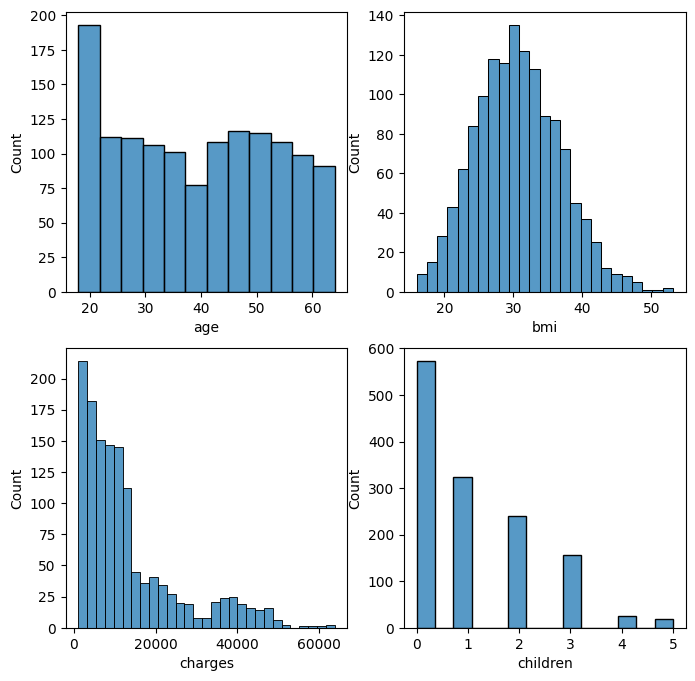

In [11]:
num_cols = ["age",'bmi','charges','children']

plt.figure(figsize = (8,8))

for idx,col in enumerate(num_cols):
  plt.subplot(2,2,idx+1)
  sns.histplot(data_frame[col])

In [12]:
# Helper function to perform univariate analysis
def univariate(data : pd.DataFrame, feature : str):
    count = data[feature].value_counts()

    print("-"*20 + feature + " Distribuci√≥n (cantidad)" + "-"*19)
    print(count)

    print("-"*20 + feature + " Distribuci√≥n (en %)" + "-"*19)

    if feature == "region":
        for i in range(4):
          print("% de " + count.index[i] + ":", (count.values[i]/data.shape[0]) * 100)
    else:
        for i in range(2):
          print("% de " + count.index[i] + ":", (count.values[i]/data.shape[0]) * 100)

    # lets visualize what we discussed above
    plt.figure(figsize = (4,4))
    if feature == "region":
        plt.bar(count.index, count.values,color = ['g','b','y','r'])
    else:
        plt.bar(count.index, count.values,color = ['g','b'])

    plt.title("Frecuencia ({})".format(feature), fontsize=14, fontweight="bold")
    plt.show()

--------------------sex Distribuci√≥n (cantidad)-------------------
sex
male      675
female    662
Name: count, dtype: int64
--------------------sex Distribuci√≥n (en %)-------------------
% de male: 50.48616305160808
% de female: 49.51383694839192


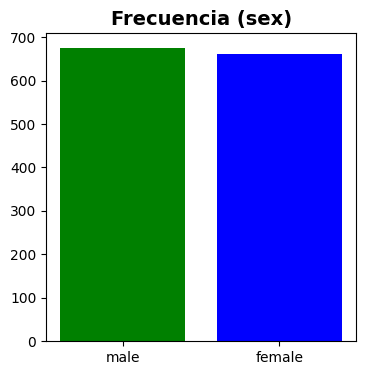

In [13]:
univariate(data_frame, "sex")

--------------------smoker Distribuci√≥n (cantidad)-------------------
smoker
no     1063
yes     274
Name: count, dtype: int64
--------------------smoker Distribuci√≥n (en %)-------------------
% de no: 79.50635751682871
% de yes: 20.49364248317128


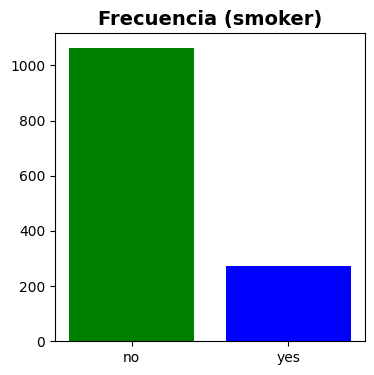

In [14]:
univariate(data_frame, "smoker")

--------------------region Distribuci√≥n (cantidad)-------------------
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
--------------------region Distribuci√≥n (en %)-------------------
% de southeast: 27.225130890052355
% de southwest: 24.30815258040389
% de northwest: 24.23335826477188
% de northeast: 24.23335826477188


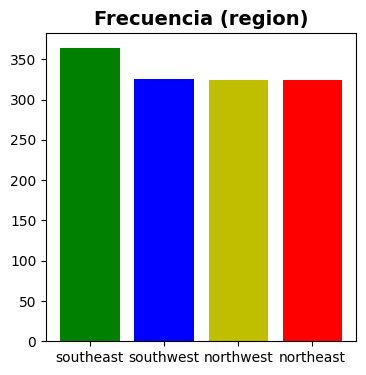

In [15]:
univariate(data_frame, "region")

## An√°lisis bivariado

Ac√° se realiza el an√°lisis usando 2 variables

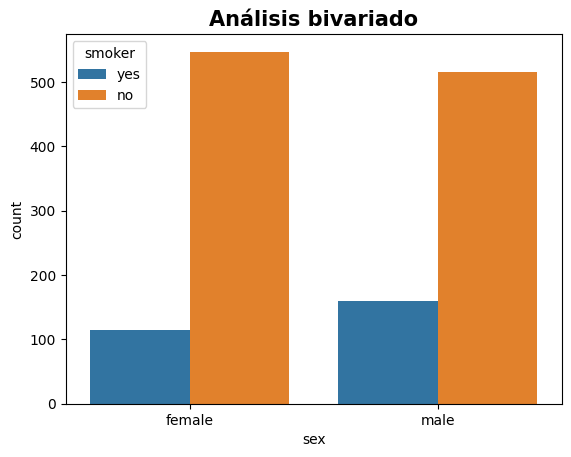

In [16]:
sns.countplot(x='sex', hue='smoker', data=data_frame)
plt.title("An√°lisis bivariado", fontsize=15, fontweight="bold")
plt.show()

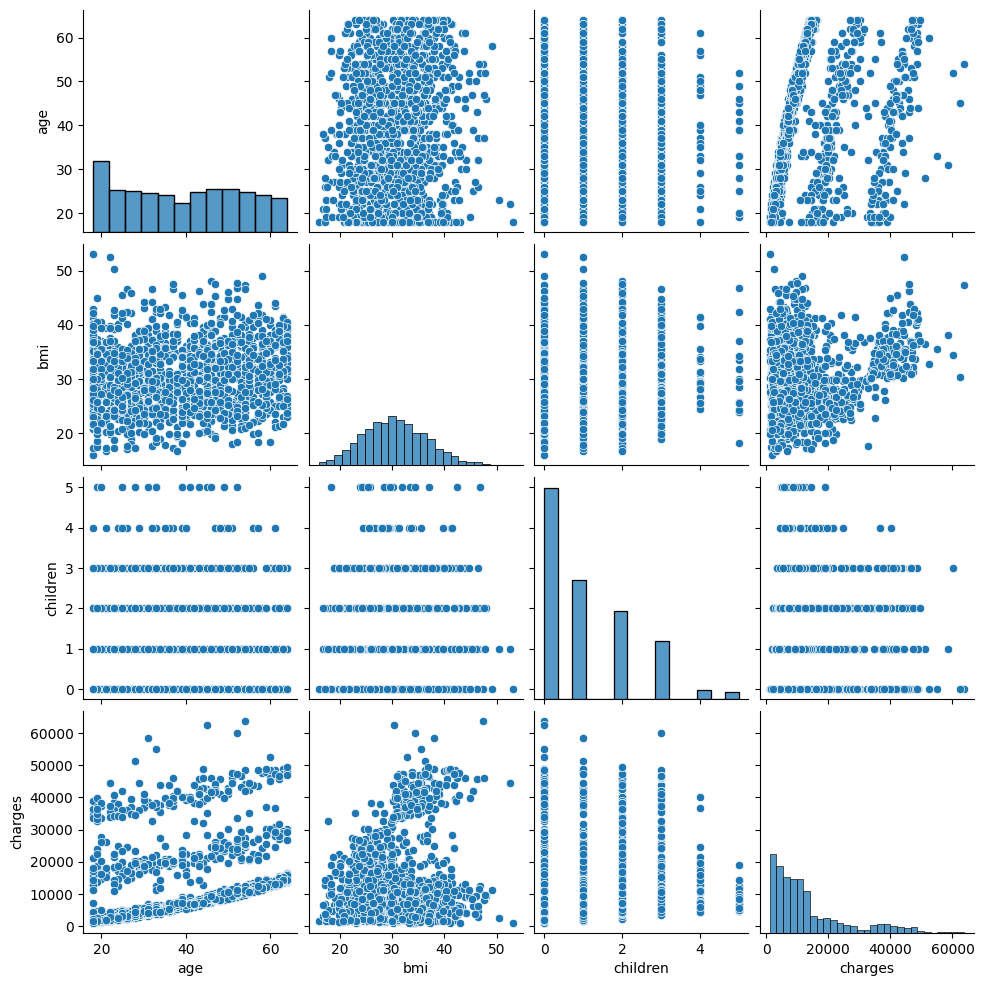

In [17]:
sns.pairplot(data_frame);



---


***Nota***

Al parecer la edad y el BMI parecen tener una buena relaci√≥n con la variable objetivo

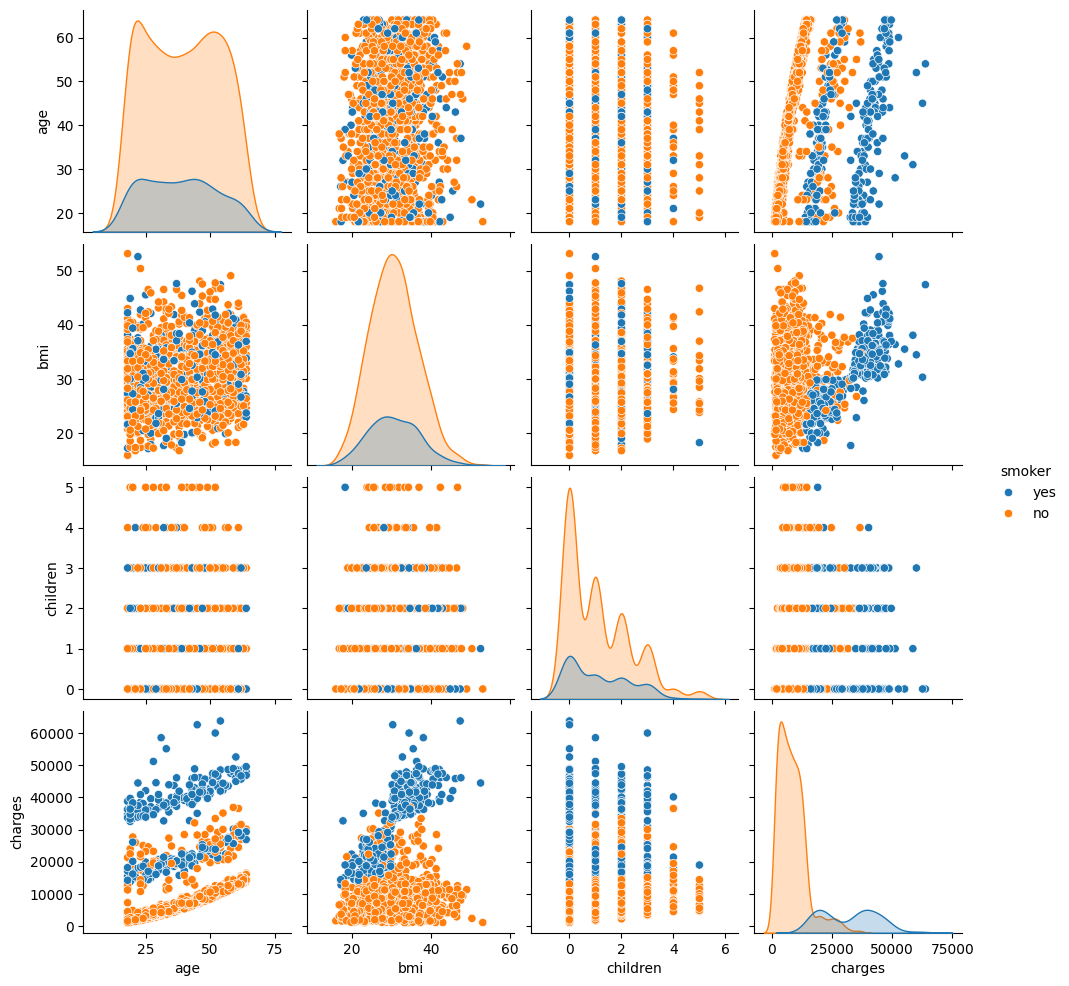

In [18]:
sns.pairplot(data_frame,hue="smoker");

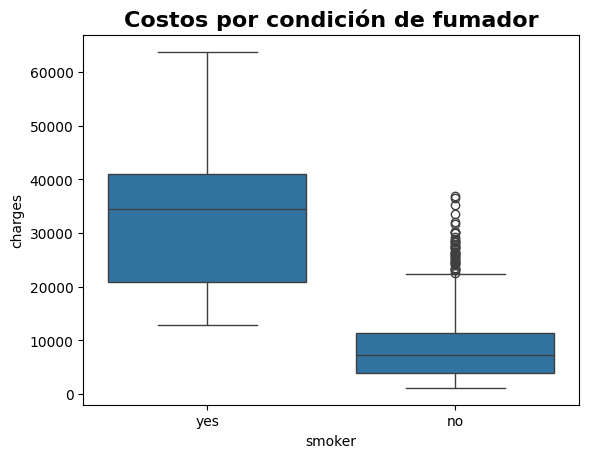

In [19]:
sns.boxplot(x='smoker', y='charges', data=data_frame)
plt.title("Costos por condici√≥n de fumador", fontsize=16, fontweight="bold")
plt.show()

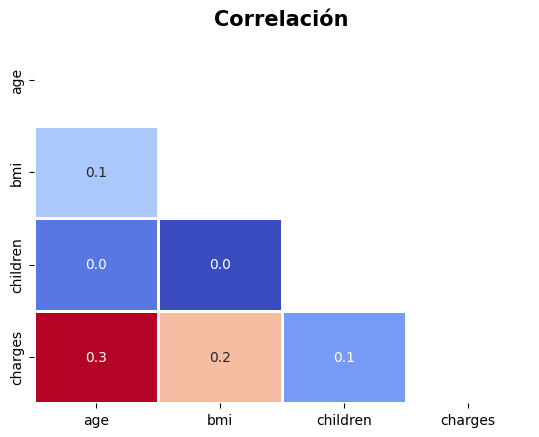

In [20]:
corrMatrix = data_frame.corr(numeric_only=True)
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            mask=mask,
            linewidths=1,
            cbar=False)
plt.title("Correlaci√≥n", fontsize=15, fontweight="bold")
plt.show()

---
**COMENTARIOS**

---

La variable que presenta mayor correlaci√≥n, considerando s√≥lo las variables num√©ricas, con la variable objetivo es la edad.

# Preparaci√≥n de los datos

In [21]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [22]:
data_frame.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520



---

**COMENTARIOS**

---

Se distinguen 3 variables a ser codificadas:
+ sex
+ smoker
+ region



In [23]:
data_frame_x = pd.read_csv("insurance.csv")
data_x = pd.get_dummies(data_frame_x[["sex", "region", "smoker"]], prefix = ["sex", "region", "smoker"])
data_x.head()

sex_female  sex_male  region_northeast  region_northwest  region_southeast  \
0        True     False             False             False             False   
1       False      True             False             False              True   
2       False      True             False             False              True   
3       False      True             False              True             False   
4       False      True             False              True             False   

   region_southwest  smoker_no  smoker_yes  
0              True      False        True  
1             False       True       False  
2             False       True       False  
3             False       True       False  
4             False       True       False



---


**Pausa**

![](https://static9.depositphotos.com/1031551/1127/i/450/depositphotos_11277001-stock-photo-note-on-computer-keyboard-pause.jpg)

¬øLogr√≥ reconocer la t√©cnica de transformaci√≥n que ha sido aplicada?



---



In [24]:
data_x = pd.concat([
    data_frame_x.drop(["sex", "region", "smoker"], axis = 1),
    data_x
], axis = 1)
data_x.head()

age     bmi  children      charges  sex_female  sex_male  region_northeast  \
0   19  27.900         0  16884.92400        True     False             False   
1   18  33.770         1   1725.55230       False      True             False   
2   28  33.000         3   4449.46200       False      True             False   
3   33  22.705         0  21984.47061       False      True             False   
4   32  28.880         0   3866.85520       False      True             False   

   region_northwest  region_southeast  region_southwest  smoker_no  smoker_yes  
0             False             False              True      False        True  
1             False              True             False       True       False  
2             False              True             False       True       False  
3              True             False             False       True       False  
4              True             False             False       True       False

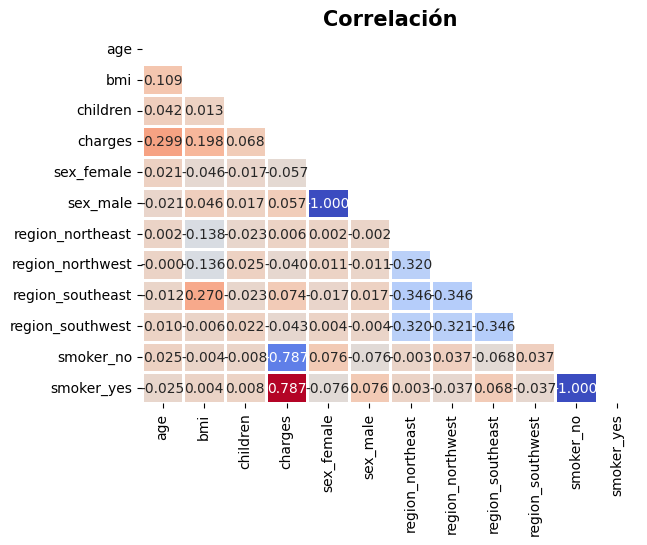

In [25]:
corrMatrix = data_x.corr(numeric_only=True)
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            mask=mask,
            linewidths=1,
            cbar=False)
plt.title("Correlaci√≥n", fontsize=15, fontweight="bold")
plt.show()



---

**COMENTARIOS**

---

+ Los valores de la correlaci√≥n de smoke_yes y smoke_no con la variable objetivo son iguales porque se trata de una variable binaria (dos posibles valores); lo mismo sucede con la variable sex.
+ Sin embargo, la correlaci√≥n de la variable objetivo con la variable regi√≥n codificada no tiene el mismo valor.

+ Los valores de correlaci√≥n del g√©nero (sex_male y sex_female) son cercanos a cero, lo que indica que el g√©nero tiene poca o ninguna relaci√≥n con los costos del seguro.

+ *smoker_yes* presenta una alta correlaci√≥n positiva con *charges*, mientras que *smoker_no* presenta una alta correlaci√≤n negativa,

+ Todas las variables de regi√≥n presentan correlaciones cercanas a cero, lo que indica que la regi√≥n donde vive una persona no incluye significativamente en los costos del seguro.

+ Complementando con la matriz de correlaci√≥n generada antes de la transformaci√≥n, se aprecia que la edad y el √≠ndice de masa corporal tienen influencia en los costos del seguro.



# Predicci√≥n de gastos m√©dicos

## LinearRegression

Un punto de partida para realizar una predicci√≥n es revisar la correlaci√≥n que existe entre la variable objetivo y el resto de las variables y eso fue lo que se hizo en la secci√≥n anterior. Ahora se revisa la distribuci√≥n de esas variables predictoras respecto de la variable objetivo.

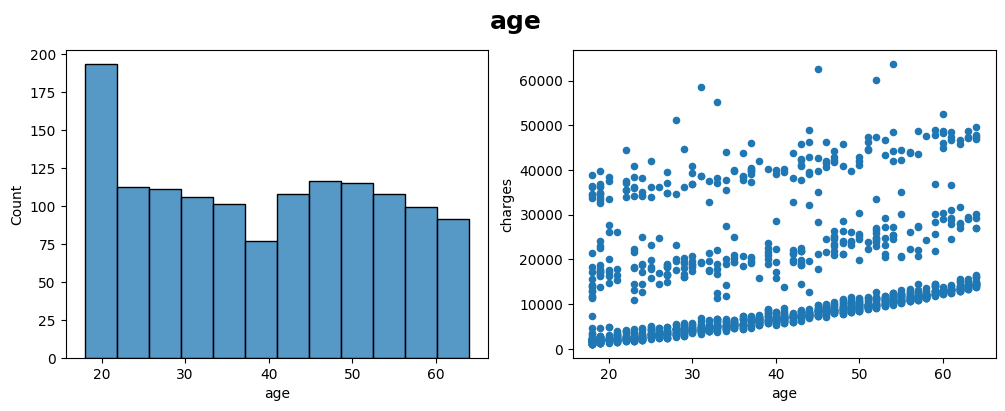

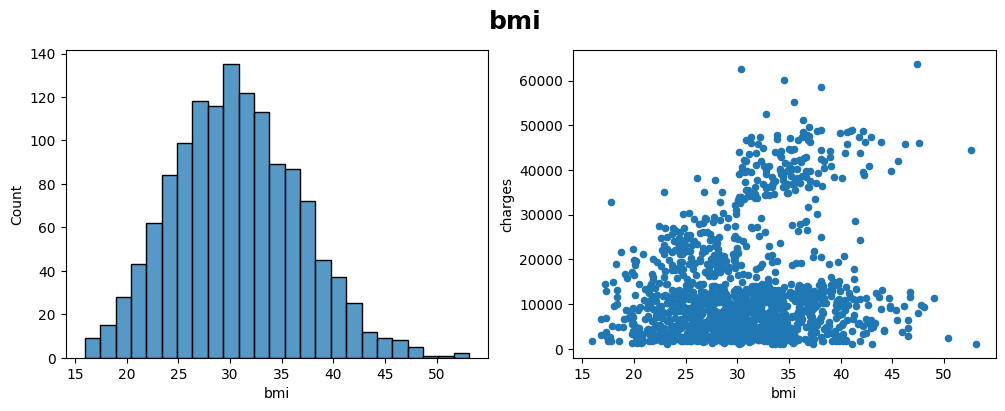

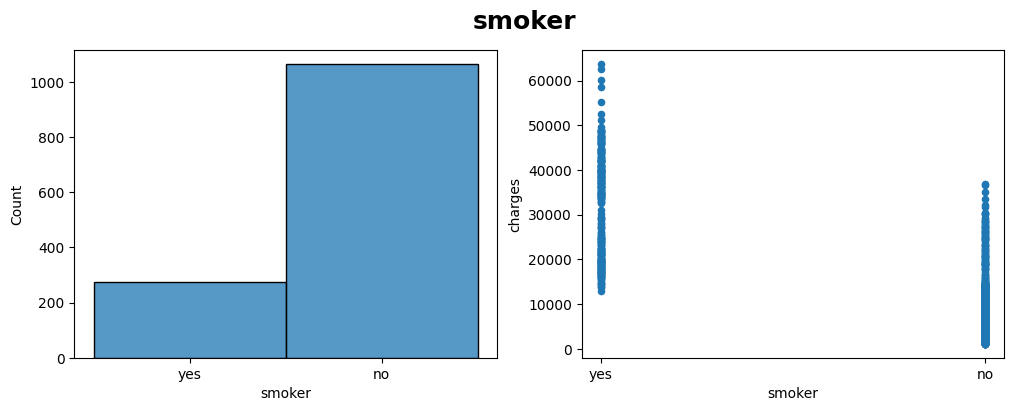

In [26]:
for col in ['age', 'bmi', 'smoker']:
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))
  fig.suptitle(col, fontsize=18, fontweight="bold")
  sns.histplot(data_frame[col], ax=ax[0], kde=False)
  data_frame[[col]+['charges']].plot.scatter(x=col, y='charges', ax=ax[1])
  plt.show()

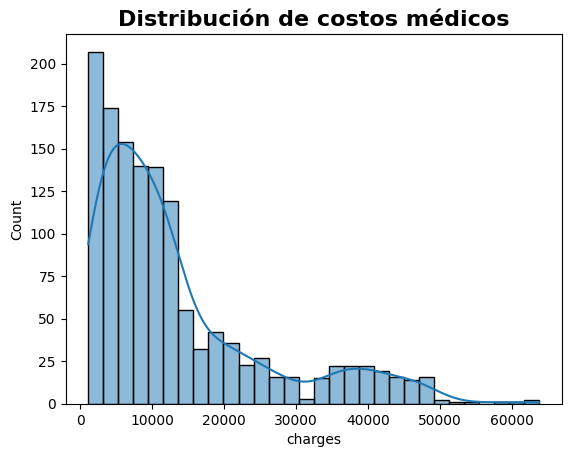

In [27]:
sns.histplot(data_frame['charges'], bins=30, kde=True)
plt.title("Distribuci√≥n de costos m√©dicos", fontsize=16, fontweight="bold")
plt.show()

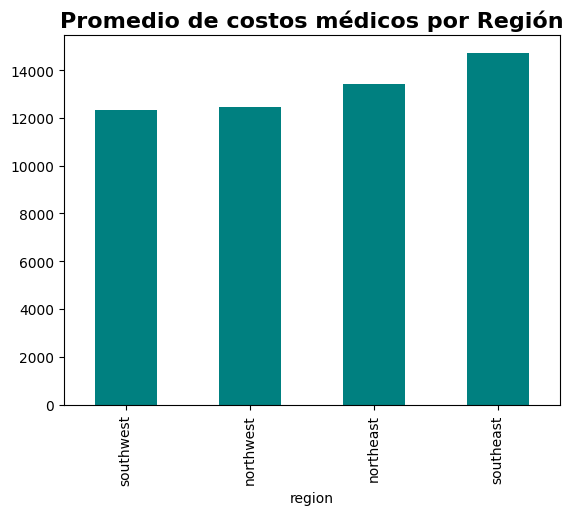

In [28]:
gastos_region = data_frame.groupby('region')['charges'].mean().sort_values()
gastos_region.plot(kind='bar', color='teal')
plt.title("Promedio de costos m√©dicos por Regi√≥n", fontsize=16, fontweight="bold")
plt.show()

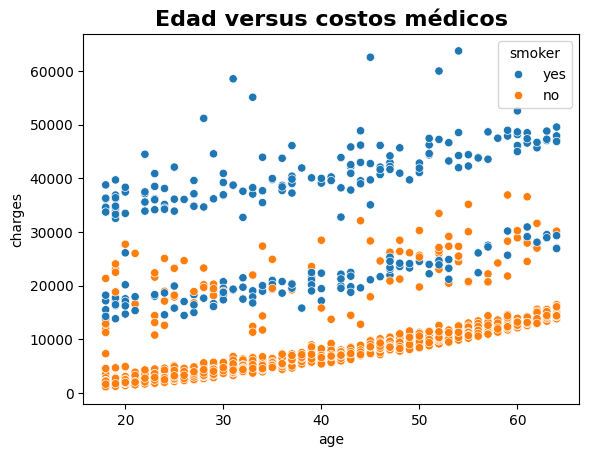

In [29]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=data_frame)
plt.title("Edad versus costos m√©dicos", fontsize=16, fontweight="bold")
plt.show()

---
üìä  **Interpretaciones**

---

‚úÖ 1. Los fumadores incurren en mayores costos m√©dicos

+ Los puntos azules (fumadores) est√°n sistem√°ticamente por encima de los puntos naranjas (no fumadores).

+ A cualquier edad, los fumadores tienden a generar costos m√©dicos mucho m√°s altos que los no fumadores.

+ Esto sugiere una fuerte relaci√≥n entre el h√°bito de fumar y el aumento de los costos m√©dicos, m√°s all√° de la edad.

üîÅ 2. La relaci√≥n con la edad tambi√©n es visible
Para ambos grupos (fumadores y no fumadores), los costos m√©dicos aumentan con la edad.

+ Es probable que una regresi√≥n solo con la edad no sea suficiente para explicar los gastos.

+ Hay un componente no lineal, especialmente visible en los no fumadores (curva ascendente m√°s pronunciada con la edad).

üìâ 3. Variabilidad en los costos m√©dicos

+ Para los fumadores hay mucha m√°s dispersi√≥n: a una misma edad, hay personas que tienen costos bajos y otras con costos extremadamente altos.

+ Esto puede deberse a comorbilidades u otros factores de riesgo asociados al tabaquismo.

üë• 4. Potencial para modelar interacciones

+ Este gr√°fico sugiere que podr√≠a haber una interacci√≥n entre edad y h√°bito de fumar, por ejemplo:

+ La pendiente del gasto m√©dico con respecto a la edad es distinta entre fumadores y no fumadores.



### Modelo 1

Predicci√≥n de los costos m√©dicos considerando edad e IMC (bmi)

In [30]:
# Se separan las variables predictoras y la predicha
X = data_frame[['age', 'bmi']] # Variables independientes
y = data_frame['charges'] # Variable dependiente

In [31]:
# Separa los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
# Creaci√≥n de modelo
modelo = LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validaci√≥n del modelo
y_pred = modelo.predict(X_test)

In [32]:
# Evaluaci√≥n del modelo
print("R^2 : %.5f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))
print("Score del modelo en entrenamiento : %.2f" % modelo.score(X_train, y_train))
print("Score del modelo en test : %.5f" % modelo.score(X_test, y_test))

R^2 : 0.09350
MSE: 161451352.14
MAE: 10090.66
Score del modelo en entrenamiento : 0.11
Score del modelo en test : 0.09350


**Conclusiones**

+ Se obtiene un $R^{2}$ de 0.11 que no es suficiente, se tratar√° de mejorar
+ La mejora considera la incorporaci√≥n de las variables categ√≥ricas que se encuentran en el conjunto de datos partiendo por la condici√≥n de fumador

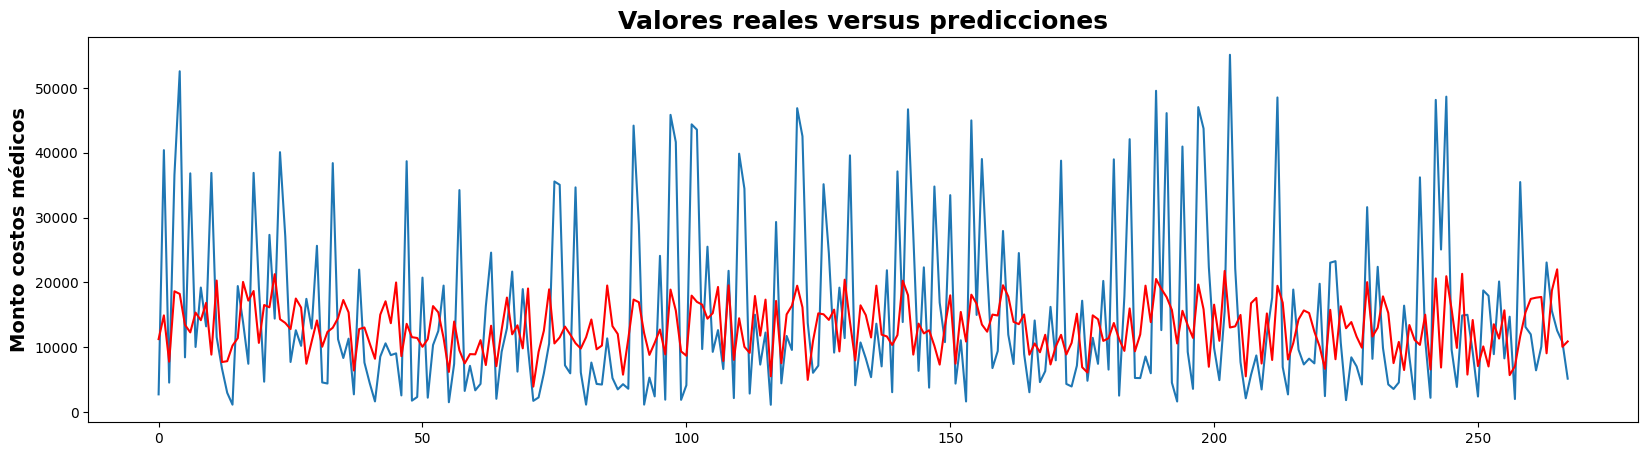

In [33]:
plt.subplots(figsize=(20,5))

plt.title("Valores reales versus predicciones", fontsize=18, fontweight="bold")
plt.ylabel("Monto costos m√©dicos", fontsize=14, fontweight="bold")
plt.plot(np.array(y_test).reshape(-1,1))
plt.plot(np.array(y_pred).reshape(-1,1), 'r');

In [34]:
# Guarda los resultados para an√°lisis posterior
history_mae, history_r2 = [], []
history_mae.append(mean_absolute_error(y_pred, y_test))
history_r2.append(modelo.score(X_test, y_test))

In [35]:
history_mae

[10090.661793146477]

### Modelo 2

Ahora considerando la variable categ√≥rica que fue transformada (condici√≥n de fumador), es decir, ahora se realiza la predici√≥n de los gastos m√©dicos considerando: edad, IMC y condici√≥n de fumador.

In [36]:
data_x.head()

age     bmi  children      charges  sex_female  sex_male  region_northeast  \
0   19  27.900         0  16884.92400        True     False             False   
1   18  33.770         1   1725.55230       False      True             False   
2   28  33.000         3   4449.46200       False      True             False   
3   33  22.705         0  21984.47061       False      True             False   
4   32  28.880         0   3866.85520       False      True             False   

   region_northwest  region_southeast  region_southwest  smoker_no  smoker_yes  
0             False             False              True      False        True  
1             False              True             False       True       False  
2             False              True             False       True       False  
3              True             False             False       True       False  
4              True             False             False       True       False

In [37]:
X = data_x[['age', 'bmi', 'smoker_yes']] # Variables independientes
y = data_x['charges'] # Variable dependiente

In [38]:
# Separa los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
# Creaci√≥n de modelo
modelo_x = LinearRegression()
# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)
# Validaci√≥n del modelo
y_pred = modelo_x.predict(X_test)

In [39]:
# Evaluaci√≥n del modelo
print("R2 : %.5f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))
print("Score del modelo en entrenamiento : %.2f" % modelo_x.score(X_train, y_train))
print("Score del modelo en test : %.5f" % modelo_x.score(X_test, y_test))

R2 : 0.70651
MSE: 45642743.42
MAE: 4728.84
Score del modelo en entrenamiento : 0.76
Score del modelo en test : 0.70651


In [40]:
history_mae.append(mean_absolute_error(y_pred, y_test))
history_r2.append(modelo_x.score(X_test, y_test))

In [41]:
print("{0:<10} : {1}".format("MAE", history_mae))
print("{0:<10} : {1}".format("R2 (score)", history_r2))

MAE        : [10090.661793146477, 4728.836875748357]
R2 (score) : [0.09350220089156214, 0.7065099231255513]


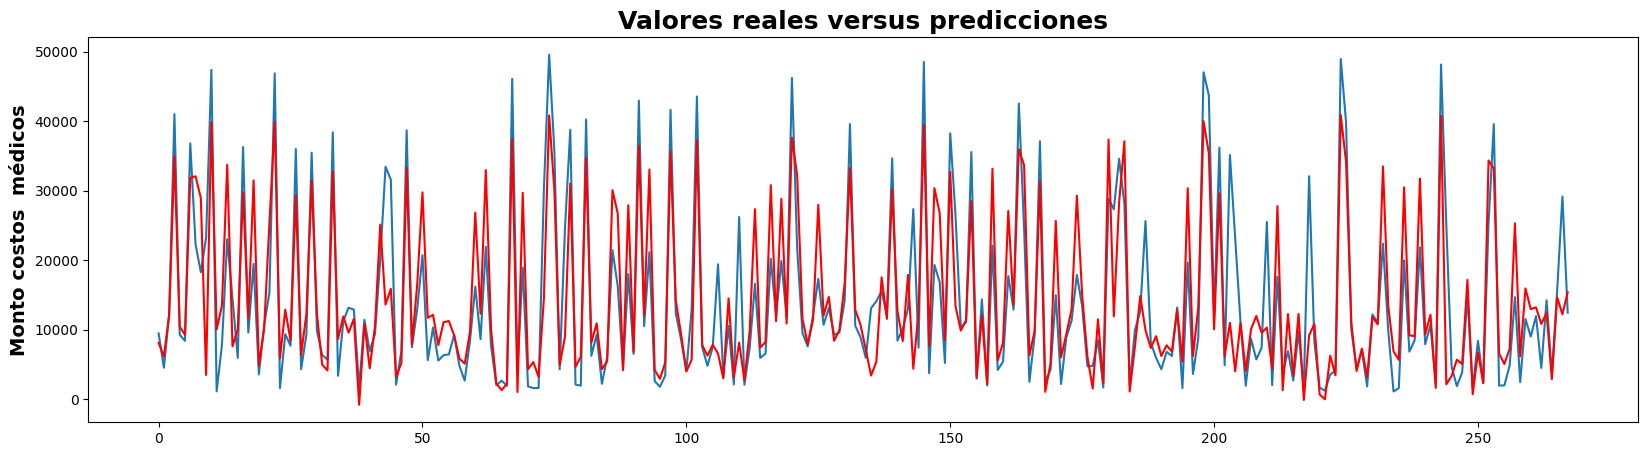

In [42]:
plt.subplots(figsize=(20,5))

plt.title("Valores reales versus predicciones", fontsize=18, fontweight="bold")
plt.ylabel("Monto costos  m√©dicos", fontsize=14, fontweight="bold")
plt.plot(np.array(y_test).reshape(-1,1))
plt.plot(np.array(y_pred).reshape(-1,1), 'r');

### Gr√°ficas para comparar resultados

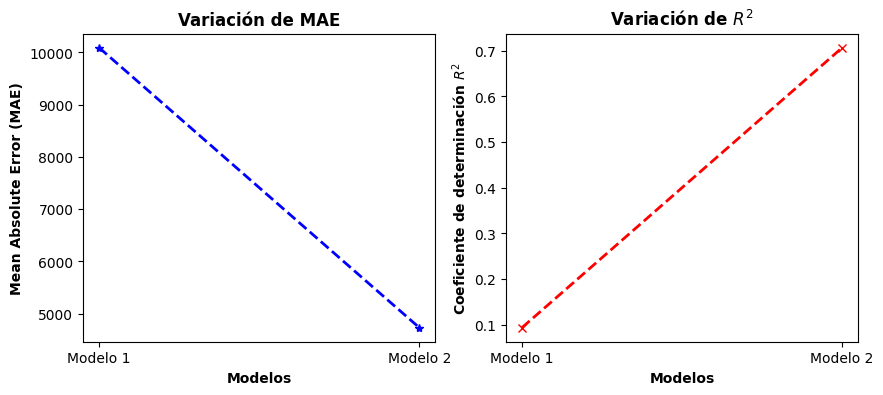

In [43]:
modelos = ['Modelo 1', 'Modelo 2']
fig, axs = plt.subplots(1, 2,figsize=(10,4))

axs[0].plot(modelos, history_mae, 'b*--', linewidth=2)
axs[0].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[0].set_ylabel("Mean Absolute Error (MAE)", fontsize=10, fontweight="bold")
axs[0].set_title("Variaci√≥n de MAE", fontsize=12, fontweight="bold")

axs[1].plot(modelos, history_r2, 'rx--', linewidth=2, markersize=6)
axs[1].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[1].set_ylabel(f"Coeficiente de determinaci√≥n $R^2$", fontsize=10, fontweight="bold")
axs[1].set_title(f"Variaci√≥n de $R^2$", fontsize=12, fontweight="bold");

### Predicciones usando el mejor modelo

In [44]:
# Recordamos los nombre y orden de las variables predictoras
X_train.columns

Index(['age', 'bmi', 'smoker_yes'], dtype='object')

In [45]:
input_features = np.array([49, 21, 0]).reshape(1,-1)
y_prediccion = modelo_x.predict(pd.DataFrame(input_features,columns=X_train.columns))
print("Paciente de {0} a√±os, BMI de {1}, fumador {2} gastar√° {3:.0f} en salud".format(input_features[:,0],
                                                                      input_features[:,1],
                                                                      ("SI" if input_features[:,2] else "NO"),
                                                                      y_prediccion[0]))

Paciente de [49] a√±os, BMI de [21], fumador NO gastar√° 7704 en salud


In [46]:
input_features = np.array([49, 21, 1]).reshape(1,-1)
y_prediccion = modelo_x.predict(pd.DataFrame(input_features,columns=X_train.columns))
print("Paciente de {0} a√±os, BMI de {1}, fumador {2} gastar√° {3:.0f} en salud".format(input_features[:,0],
                                                                      input_features[:,1],
                                                                      ("SI" if input_features[:,2] else "NO"),
                                                                      y_prediccion[0]))

Paciente de [49] a√±os, BMI de [21], fumador SI gastar√° 32107 en salud


### Tratando de mejorar m√°s

In [47]:
# Escalamos las caracter√≠sticas num√©ricas
scale = ['age','bmi']
scaler = StandardScaler()

# Aplicamos escalar a todas las columnas
data_scaled = data_x.copy()
data_scaled[scale] = scaler.fit_transform(data_scaled[scale])

In [48]:
data_scaled

age       bmi  children      charges  sex_female  sex_male  \
0    -1.438764 -0.453320         0  16884.92400        True     False   
1    -1.509965  0.509621         1   1725.55230       False      True   
2    -0.797954  0.383307         3   4449.46200       False      True   
3    -0.441948 -1.305531         0  21984.47061       False      True   
4    -0.513149 -0.292556         0   3866.85520       False      True   
...        ...       ...       ...          ...         ...       ...   
1333  0.768473  0.050297         3  10600.54830       False      True   
1334 -1.509965  0.206139         0   2205.98080        True     False   
1335 -1.509965  1.014878         0   1629.83350        True     False   
1336 -1.296362 -0.797813         0   2007.94500        True     False   
1337  1.551686 -0.261388         0  29141.36030        True     False   

      region_northeast  region_northwest  region_southeast  region_southwest  \
0                False             False             False              True   
1                False             False              True             False   
2                False             False              True             False   
3                False              True             False             False   
4                False              True             False             False   
...                ...               ...               ...               ...   
1333             False              True             False             False   
1334              True             False             False             False   
1335             False             False              True             False   
1336             False             False             False              True   
1337             False              True             False             False   

      smoker_no  smoker_yes  
0         False        True  
1          True       False  
2          True       False  
3          True       False  
4          True       False  
...         ...         ...  
1333       True       False  
1334       True       False  
1335       True       False  
1336       True       False  
1337      False        True  

[1338 rows x 12 columns]

In [49]:
X_scaled = data_scaled[['age', 'bmi', 'smoker_yes']] # Variables independientes
y = data_scaled['charges'] # Variable dependiente

In [50]:
# Separa los datos en entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=29)
# Creaci√≥n de modelo
modelo_z = LinearRegression()
# Entrenamiento del modelo
modelo_z.fit(X_train, y_train)
# Validaci√≥n del modelo
y_pred = modelo_z.predict(X_test)

In [51]:
# Evaluaci√≥n del modelo
print("R^2 : %.5f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))
print("Score del modelo en entrenamiento : %.2f" % modelo_z.score(X_train, y_train))
print("Score del modelo en test : %.5f" % modelo_z.score(X_test, y_test))

R^2 : 0.70651
MSE: 45642743.42
MAE: 4728.84
Score del modelo en entrenamiento : 0.76
Score del modelo en test : 0.70651


In [52]:
history_mae.append(mean_absolute_error(y_pred, y_test))
history_r2.append(modelo_z.score(X_test, y_test))

In [53]:
print("{0:<10} : {1}".format("MAE", history_mae))
print("{0:<10} : {1}".format("R2 (score)", history_r2))

MAE        : [10090.661793146477, 4728.836875748357, 4728.836875748357]
R2 (score) : [0.09350220089156214, 0.7065099231255513, 0.7065099231255513]




---
**Fin del tema oficial, lo que viene despu√©s es un bonus track**


In [54]:
# Guarda el resultado del mejor modelo usando regresi√≥n lineal
history_mae_inter_model = []
history_r2_inter_model = []
history_mae_inter_model.append(mean_absolute_error(y_pred, y_test))
history_r2_inter_model.append(modelo_x.score(X_test, y_test))

## DecisionTreeRegressor - Bonus track

### Terminolog√≠a de los √°rboles de decisi√≥n

Aqu√≠ est√° la terminolog√≠a com√∫nmente utilizada en los √°rboles de decisi√≥n:

* **Nodo ra√≠z:** es el primer nodo del √°rbol de decisi√≥n y no tiene un nodo padre. Representa el conjunto de datos completo y es el punto de partida para la construcci√≥n del √°rbol.

* **Divisi√≥n:** es la separaci√≥n de un conjunto de datos en subconjuntos m√°s peque√±os y homog√©neos en funci√≥n de un atributo determinado. Cada divisi√≥n genera un nuevo nodo y una nueva rama en el √°rbol.

* **Nodo de decisi√≥n:** es un nodo interno del √°rbol que representa una caracter√≠stica del conjunto de datos y tiene al menos dos ramas que indican las posibles opciones para esa caracter√≠stica.

* **Nodo hoja:** es un nodo terminal del √°rbol que no tiene m√°s ramas y representa una etiqueta de clase o una predicci√≥n para el conjunto de datos de entrada.

* **Poda (pruning):** es un proceso de eliminaci√≥n de nodos innecesarios del √°rbol para evitar el sobreajuste (overfitting) del modelo y mejorar su capacidad de generalizaci√≥n. La poda se realiza despu√©s de construir el √°rbol y puede ser prepruning o postpruning.

* **Rama:** es una conexi√≥n entre dos nodos del √°rbol que representa una opci√≥n posible para un atributo determinado.

* **Nodo madre/padre:** es el nodo inmediatamente anterior a un nodo espec√≠fico en el √°rbol. Un nodo puede tener varios nodos hijos y s√≥lo tiene un nodo padre.

* **Hijo:** es un nodo inmediatamente posterior a un nodo espec√≠fico en el √°rbol. Un nodo puede tener varios nodos hijos y s√≥lo tiene un nodo padre.

In [55]:
# Se separan las variables predictoras y la predecida
X = data_x[['age', 'bmi', 'smoker_yes']] # Variables independientes
y = data_x['charges'] # Variable dependiente

In [56]:
# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [57]:
a_modelo = DecisionTreeRegressor(max_depth = 5, random_state = 29)
# Entrenamiento del modelo
a_modelo.fit(X_train, y_train)

# Validaci√≥n del modelo
y_pred = a_modelo.predict(X_test)

# Evaluaci√≥n del modelo
print("{0:<40} = {1:.4f}".format('Precisi√≥n del modelo (en entrenamiento)', a_modelo.score(X_train, y_train)))
print("{0:<40} = {1:.4f}".format('Precisi√≥n del modelo (en validaci√≥n)', a_modelo.score(X_test, y_test)))

Precisi√≥n del modelo (en entrenamiento)  = 0.8807
Precisi√≥n del modelo (en validaci√≥n)     = 0.8278


In [58]:
# Guarda resultados para comparar
history_mae_inter_model.append(mean_absolute_error(y_test, y_pred))
history_r2_inter_model.append(r2_score(y_test, y_pred))

### Representaci√≥n gr√°fica del √°rbol

Profundidad del √°rbol: 5
N√∫mero de nodos terminales: 32


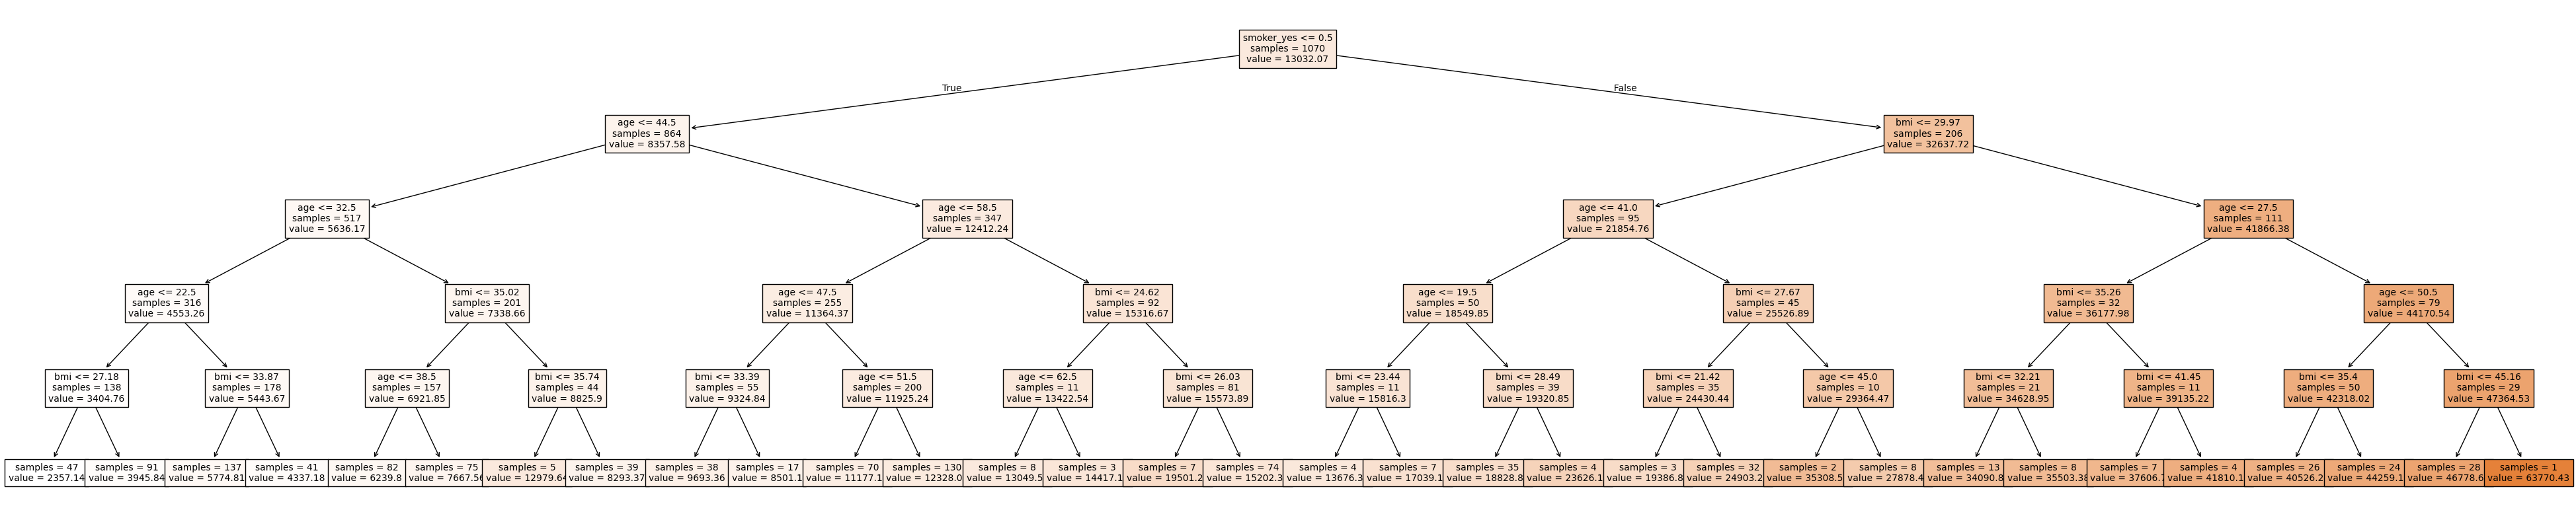

In [59]:
fig, ax = plt.subplots(figsize=(50, 10))

print(f"Profundidad del √°rbol: {a_modelo.get_depth()}")
print(f"N√∫mero de nodos terminales: {a_modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = a_modelo,
            feature_names = ['age', 'bmi', 'smoker_yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [62]:
# Arbol como "texto"
print(export_text(a_modelo, feature_names=list(X.columns)))

|--- smoker_yes <= 0.50
|   |--- age <= 44.50
|   |   |--- age <= 32.50
|   |   |   |--- age <= 22.50
|   |   |   |   |--- bmi <= 27.18
|   |   |   |   |   |--- value: [2357.14]
|   |   |   |   |--- bmi >  27.18
|   |   |   |   |   |--- value: [3945.84]
|   |   |   |--- age >  22.50
|   |   |   |   |--- bmi <= 33.87
|   |   |   |   |   |--- value: [5774.81]
|   |   |   |   |--- bmi >  33.87
|   |   |   |   |   |--- value: [4337.18]
|   |   |--- age >  32.50
|   |   |   |--- bmi <= 35.02
|   |   |   |   |--- age <= 38.50
|   |   |   |   |   |--- value: [6239.80]
|   |   |   |   |--- age >  38.50
|   |   |   |   |   |--- value: [7667.56]
|   |   |   |--- bmi >  35.02
|   |   |   |   |--- bmi <= 35.74
|   |   |   |   |   |--- value: [12979.64]
|   |   |   |   |--- bmi >  35.74
|   |   |   |   |   |--- value: [8293.37]
|   |--- age >  44.50
|   |   |--- age <= 58.50
|   |   |   |--- age <= 47.50
|   |   |   |   |--- bmi <= 33.39
|   |   |   |   |   |--- value: [9693.36]
|   |   |   |   |--

### Algunas lecturas del √°rbol

+ El valor que aparece en el nodo ra√≠z asociado a samples (1070) corresponde a la cantidad de muestras usadas en el entrenamiento:

```
X_train.shape[0]
```
+ Las condiciones de cada nodo est√°n en funci√≥n de las variables predictoras (incluidas en el modelo). Se puede comprobar:


```
modelo.feature_names_in_
```
+ Es posible conocer la importancia de cada variable dentro del modelo:



```
modelo.feature_importances_
```

In [63]:
a_modelo.feature_names_in_

array(['age', 'bmi', 'smoker_yes'], dtype=object)

In [64]:
a_modelo.feature_importances_

array([0.11473231, 0.16271467, 0.72255302])

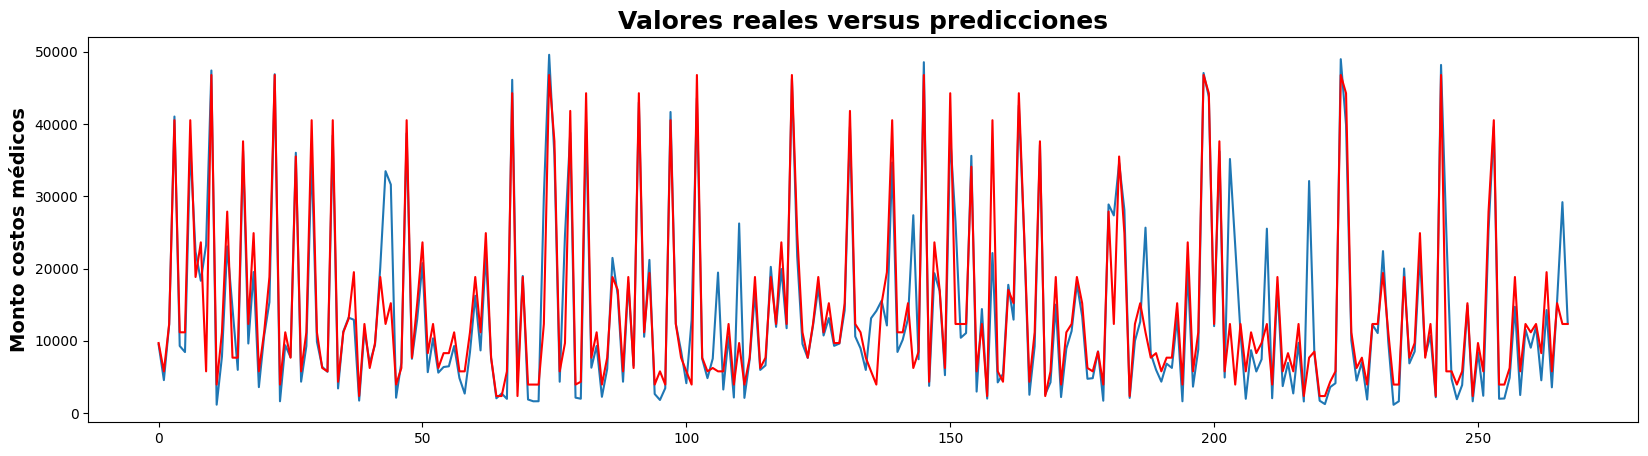

In [65]:
plt.subplots(figsize=(20,5))

plt.title("Valores reales versus predicciones", fontsize=18, fontweight="bold")
plt.ylabel("Monto costos m√©dicos", fontsize=14, fontweight="bold")
plt.plot(np.array(y_test).reshape(-1,1))
plt.plot(np.array(y_pred).reshape(-1,1), 'r');

In [66]:
input_features = np.array([49, 21, 0]).reshape(1,-1)
y_prediccion = a_modelo.predict(pd.DataFrame(input_features,columns=X_train.columns))
print("Paciente de {0} a√±os, BMI de {1}, {2} fumador gastar√° {3:.0f} en salud".format(input_features[:,0],
                                                                      input_features[:,1],
                                                                      ("SI" if input_features[:,2] else "NO"),
                                                                      y_prediccion[0]))

Paciente de [49] a√±os, BMI de [21], NO fumador gastar√° 11177 en salud


In [67]:
input_features = np.array([49, 21, 1]).reshape(1,-1)
y_prediccion = a_modelo.predict(pd.DataFrame(input_features,columns=X_train.columns))
print("Paciente de {0} a√±os, BMI de {1}, {2} fumador gastar√° {3:.0f} en salud".format(input_features[:,0],
                                                                      input_features[:,1],
                                                                      ("SI" if input_features[:,2] else "NO"),
                                                                      y_prediccion[0]))

Paciente de [49] a√±os, BMI de [21], SI fumador gastar√° 19387 en salud


## Comparaci√≥n de modelos LinearRegressor y DecisionTreeRegressor

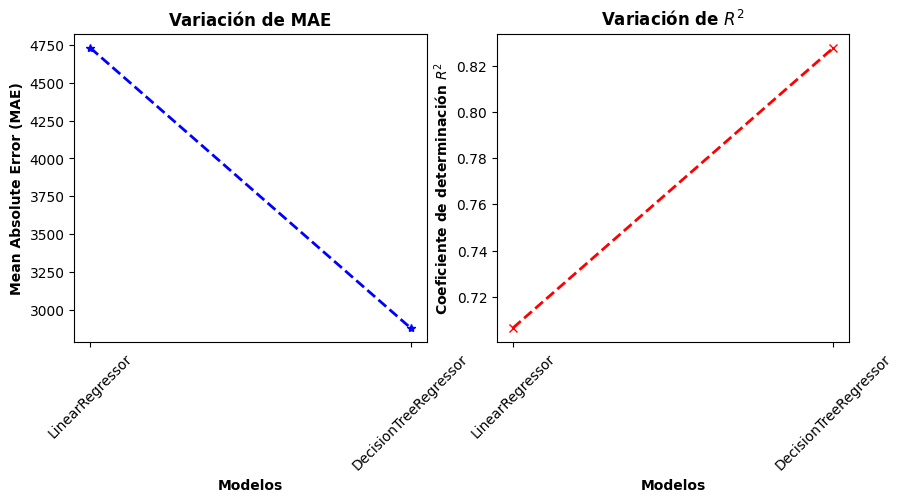

In [68]:
modelos = ['LinearRegressor', 'DecisionTreeRegressor']
fig, axs = plt.subplots(1, 2,figsize=(10,4))

axs[0].plot(modelos, history_mae_inter_model, 'b*--', linewidth=2)
axs[0].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel("Mean Absolute Error (MAE)", fontsize=10, fontweight="bold")
axs[0].set_title("Variaci√≥n de MAE", fontsize=12, fontweight="bold")

axs[1].plot(modelos, history_r2_inter_model, 'rx--', linewidth=2, markersize=6)
axs[1].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylabel(f"Coeficiente de determinaci√≥n $R^2$", fontsize=10, fontweight="bold")
axs[1].set_title(f"Variaci√≥n de $R^2$", fontsize=12, fontweight="bold");